In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 타자 기록 시각화

In [88]:
# 규정타석을 채우는 타자 데이터/ 6개 지표 데이터 

total_hit = pd.read_csv('hit_total.csv', index_col=False).drop('idx', axis=1)
total_hit

,code,avg,slg,bbk,wpa,re24,obp
0,50066,0.226,0.343,0.214,0.000,0.000,0.259
1,50165,0.268,0.545,0.405,-0.007,0.050,0.355
2,50202,0.291,0.350,0.633,0.000,0.000,0.355
3,50293,0.239,0.310,0.400,-0.002,-0.120,0.321
4,50350,0.268,0.364,0.513,-0.014,-0.200,0.328
...,...,...,...,...,...,...,...
297,79465,0.245,0.286,0.457,-0.001,-0.245,0.335
298,79608,0.302,0.441,0.867,0.003,-0.070,0.368
299,79705,0.241,0.392,0.431,0.000,0.000,0.319
300,99606,0.293,0.418,0.327,0.000,-0.260,0.367


In [114]:
total_hit[total_hit['code'] == 72443]

,code,avg,slg,bbk,wpa,re24,obp
233,72443,0.301,0.49,0.838,0.012,0.1,0.405


In [89]:
total_hit['avg'].quantile([0.25, 0.5, 0.75])

0.25    0.23525
0.50    0.26000
0.75    0.27800
Name: avg, dtype: float64

In [90]:
total_hit.columns

Index(['code', 'avg', 'slg', 'bbk', 'wpa', 're24', 'obp'], dtype='object')

In [ ]:
# # 타자 통산 기록 10% 분위 수와 90% 분위 수
# avg = [0.214, 0.3009]
# slg	= [0.288, 0.478]
# bb/k = [0.242, 0.780]
# wpa = [-0.013, 0.0]
# re24 = [-0.245, 0.0]
# obp	= [0.272, 0.376]

In [116]:
# 타자 지표 6개를 받아 시각화 그래프를 리턴하는 코드

def hit_records_graph(stat_list):

    # 타자 통산 기록 10% 분위 수와 90% 분위 수
    min_val = [0.214, 0.288, 0.242, -0.013, -0.245, 0.272]
    max_val = [0.3009, 0.478, 0.780, 0.0, 0.0, 0.376]

    # 10% 이하, 90% 이상 값 치환
    scaled_features = []
    for i, feature in enumerate(stat_list):
        if feature < min_val[i]:
            feature =  min_val[i]
        elif feature > max_val[i]:
            feature = max_val[i]
        # scaliing -> 1~9범위의 값을 각 등급에 해당하는 값으로 치환
        x = round((feature - min_val[i]) * (8 / (max_val[i] - min_val[i])) + 1, 2)
        scaled_features.append(x)

    print(scaled_features)

    # 시각화

    fig = px.line_polar(scaled_features, r = scaled_features,
                       theta = ['avg', 'slg', 'bbk', 'wpa', 're24', 'obp'], line_close=True, color_discrete_sequence=px.colors.sequential.Plasma_r,
                       template='plotly_dark', range_r = [0, 10.0],
                       direction="counterclockwise", start_angle=90)
    fig.update_traces(fill='toself')

    return fig.show()

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0]


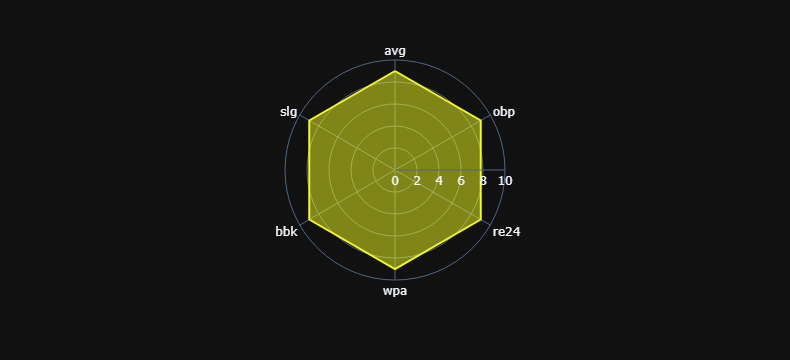

In [117]:
hit_records_graph([0.301,0.49,0.838,0.012,0.1,0.405])

## 투수 기록 시각화

In [118]:
# 규정이닝을 채우는 투수 데이터/ 6개 지표 데이터 

total_pit = pd.read_csv('pit_total.csv', index_col=False).drop('idx', axis=1)
total_pit

,code,era,kpit,kbb,wpa,re24,whip
0,50030,3.48,0.044,2.203,0.033,0.860,1.332
1,50040,4.11,0.045,2.246,0.036,0.760,1.483
2,50126,4.59,0.042,1.821,0.007,0.560,1.500
3,50157,4.52,0.041,1.926,0.012,0.560,1.539
4,50234,2.79,0.068,4.432,0.080,1.055,1.097
...,...,...,...,...,...,...,...
233,79229,5.31,0.026,1.514,-0.106,-0.670,1.655
234,79764,4.81,0.043,2.508,-0.000,0.525,1.475
235,79847,4.96,0.053,1.812,0.006,0.560,1.497
236,95657,5.48,0.054,2.897,0.031,0.500,1.552


In [149]:
# 투수 지표 6개를 받아 시각화 그래프를 리턴하는 코드

def pit_records_graph(stat_list):

    # 타자 통산 기록 10% 분위 수와 90% 분위 수
    min_val = [3.156, 0.032, 1.1161, -0.0839, -0.495, 1.2461]
    max_val = [6.409, 0.056, 3.4335, 0.0743, 1.33, 1.8138]

    # 10% 이하, 90% 이상 값 치환
    scaled_features = []
    for i, feature in enumerate(stat_list):

        if feature < min_val[i]:
            feature =  min_val[i]
        elif feature > max_val[i]:
            feature = max_val[i]
        # scaliing -> 1~9범위의 값을 각 등급에 해당하는 값으로 치환
        x = round((feature - min_val[i]) * (8 / (max_val[i] - min_val[i])) + 1, 2)
            
        scaled_features.append(x)
        
    scaled_features[0] = 10-scaled_features[0]
    scaled_features[5] = 10-scaled_features[5]
    print(scaled_features)

    # 시각화

    fig = px.line_polar(scaled_features, r = scaled_features,
                       theta = ['era','kpit','kbb','wpa','re24','whip'], line_close=True, color_discrete_sequence=px.colors.sequential.Plasma_r,
                       template='plotly_dark', range_r = [0, 10.0],
                       direction="counterclockwise")
    fig.update_traces(fill='toself')

    return fig.show()

[9.0, 9.0, 9.0, 9.0, 7.79, 9.0]


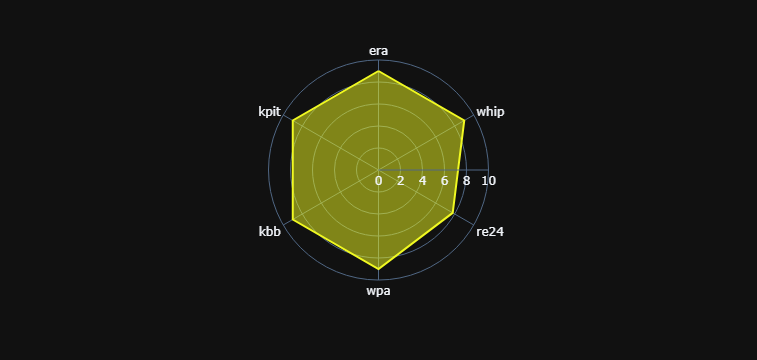

In [150]:
pit_records_graph([2.79,0.068,4.432,0.080,1.055,1.097])